In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

## Task a

In [27]:
def mooney_rivlin(T, a, b, l):
    return (a + b/l) * (l**2 - 1/l) - T

def mooney_rivlin_diff(T, a, b, l):
    return a*(1/l**2 + 2*l) + 2*b/l**3 + b
    
def newton(f, l_0, tol=1e-5, **kwargs):
    err = tol * 3
    l = l_0 
    
    while err > tol:
        all_args = kwargs
        all_args['l'] = l
        
        delta_l = mooney_rivlin(**all_args) / mooney_rivlin_diff(**all_args)
        err = abs(delta_l)
        l -= delta_l
        
    return l

In [26]:
newton(mooney_rivlin, 1, T=10, a=1, b=1)

2.777154110014522

## Task d

In [37]:
def mooney_rivlin_stress(a, b, x):
    return x**2 * (a*(1 + x**2) + b) / (1 + x**2)**2 

In [52]:
L = 1
n = 20
a = 20
b = 10
u_0 = 0
h = L / (n + 1)

xs = np.linspace(0, L, n + 1)
Ts = [mooney_rivlin_stress(a, b, x) for x in xs]
ls = [newton(mooney_rivlin, 1, T=T, a=a, b=b) for T in Ts] # lambdas

us = [u_0]
for i in range(1, n + 1):
    interm_sums = np.sum([ls[j] for j in range(1, i)])
    u_i = u_0 + h * (-i + ls[0]/2 + interm_sums + ls[i]/2)
    us.append(u_i)

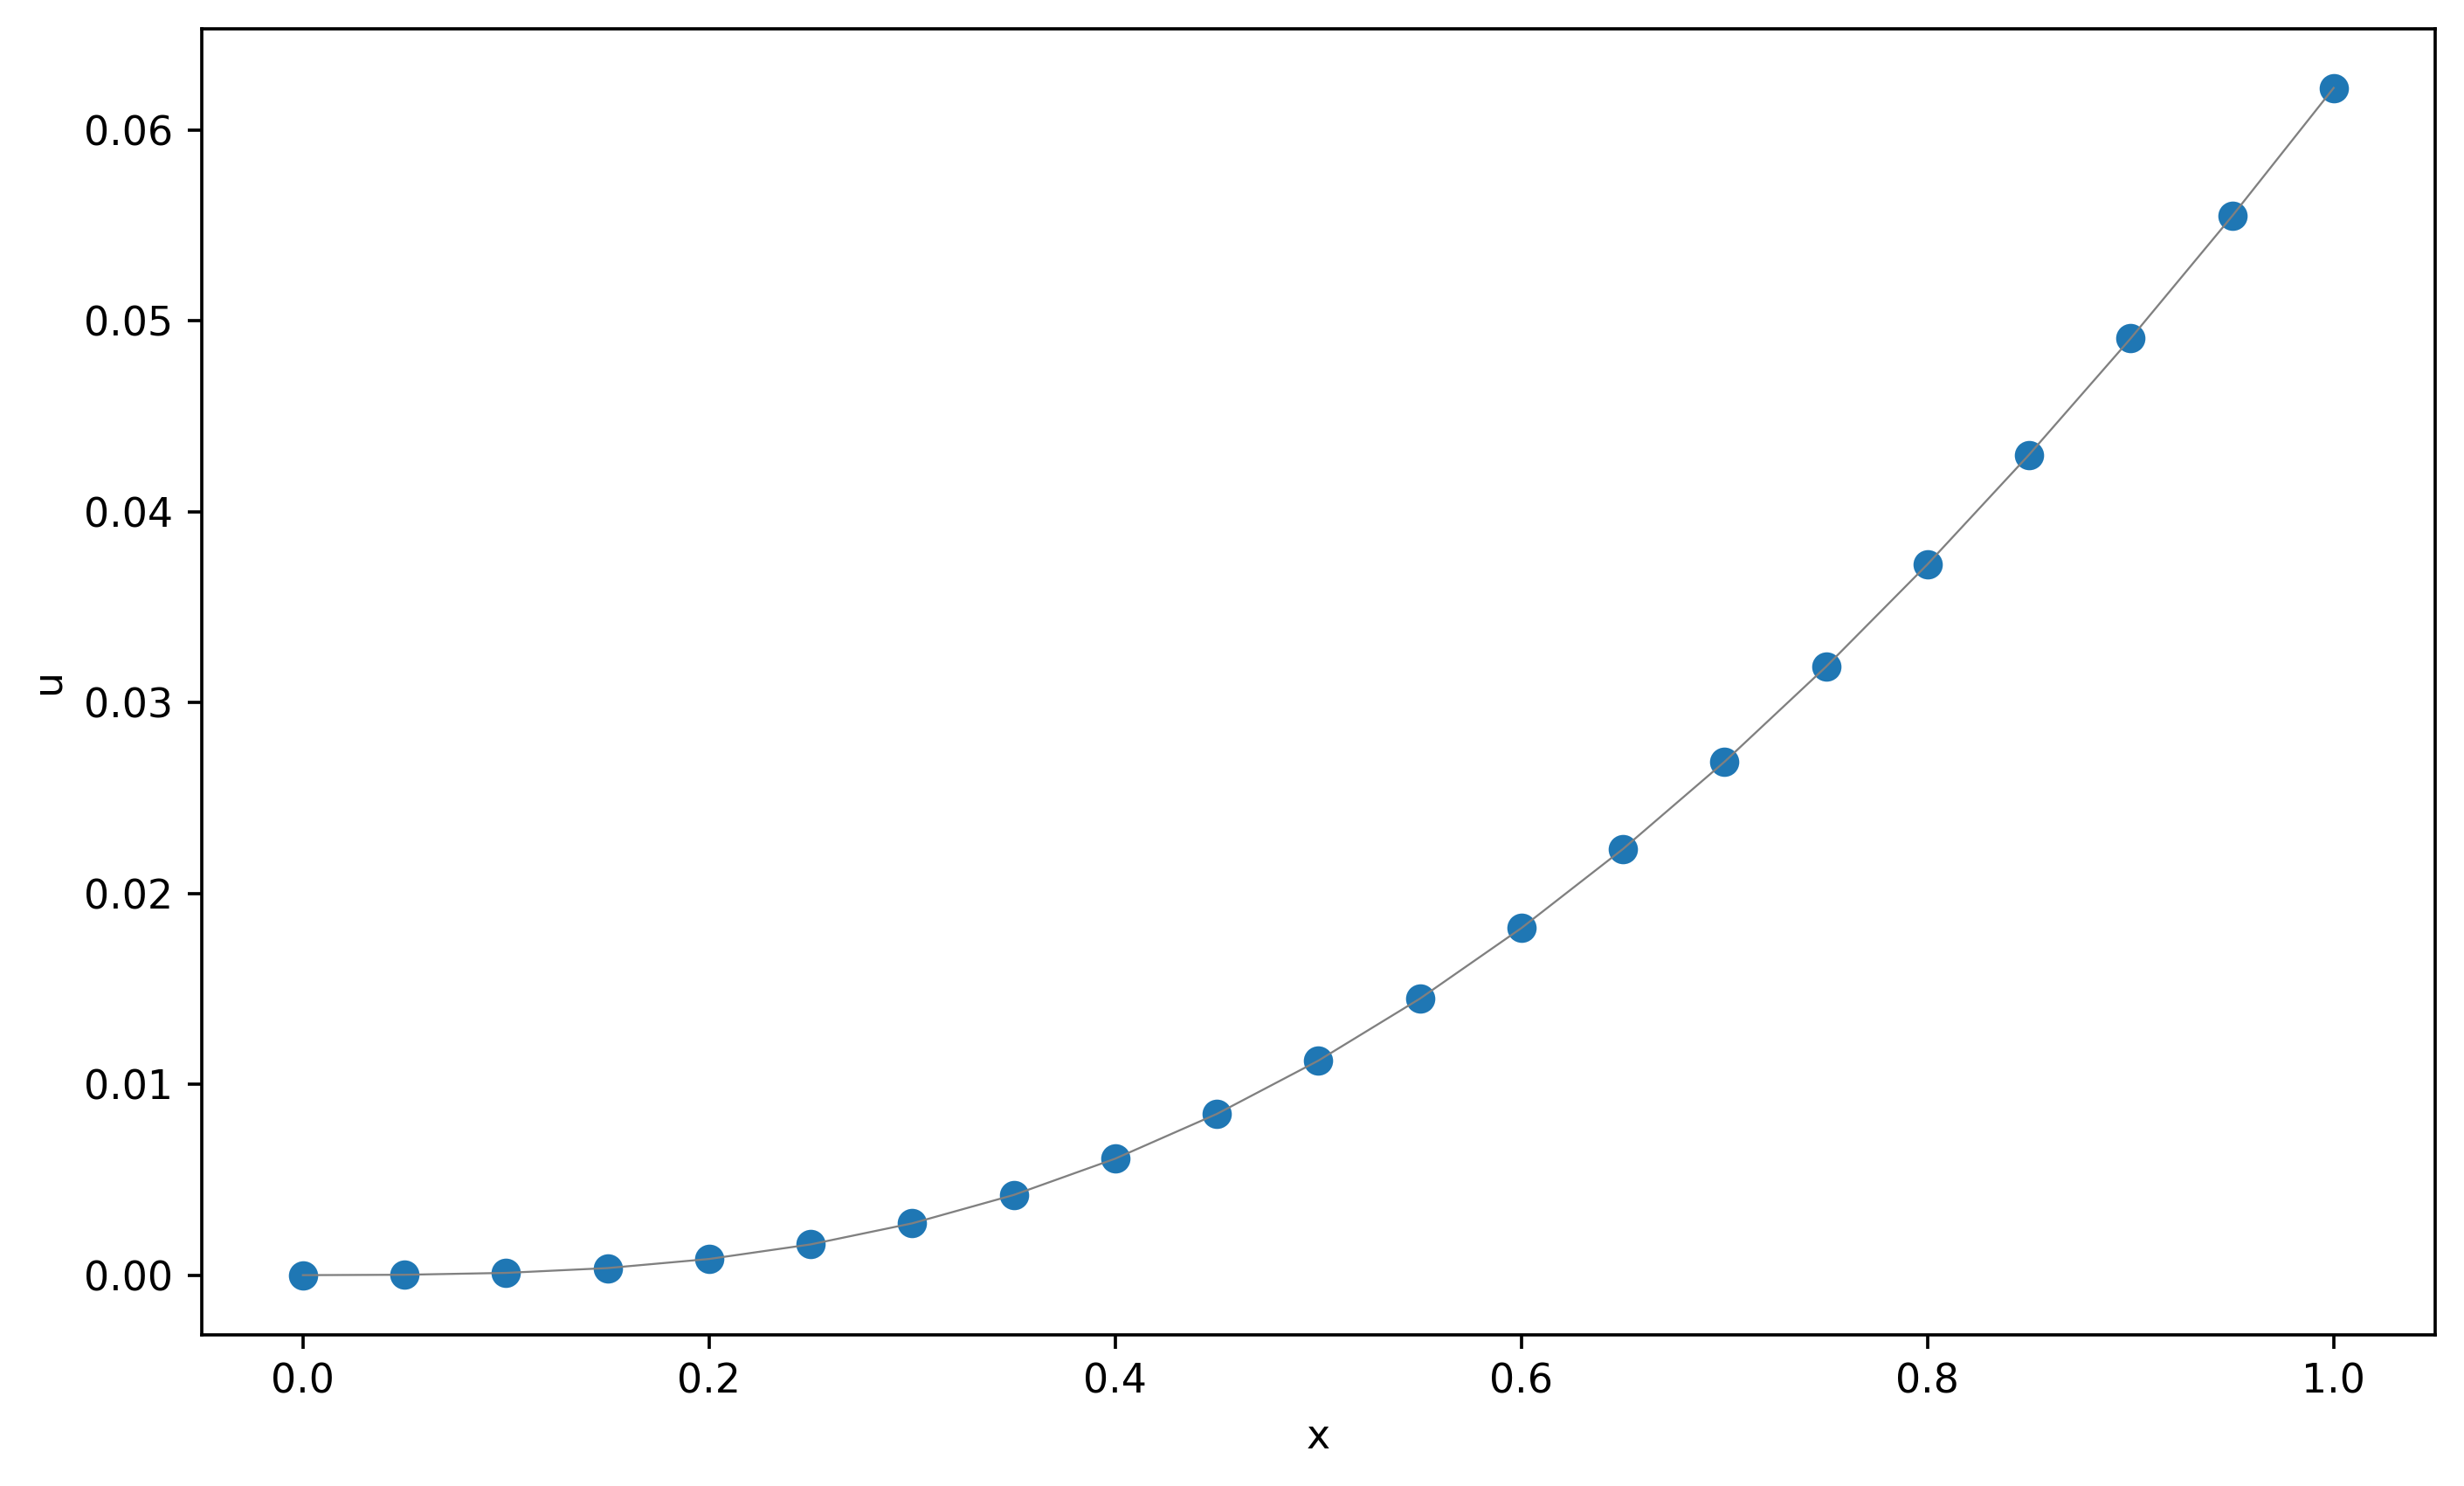

In [71]:
plt.figure(figsize=(10, 6), dpi=330)

plt.plot(xs, us, color="grey", linewidth=0.5)
plt.scatter(xs, us, s=40)

plt.xlabel("x")
plt.ylabel("u")
plt.show()

# Problem 2
## Task d

In [104]:
def euler(diffeq, y_0, t_init, t_fin, num_steps):
    k = (t_fin - t_init) / num_steps
    y = y_0
    
    for t in np.linspace(t_init, t_fin, num_steps + 1):
        y += k * diffeq(t, y)
    
    return y

def rk2(diffeq, y_0, t_init, t_fin, num_steps):
    k = (t_fin - t_init) / num_steps
    y = y_0
    
    for t in np.linspace(t_init, t_fin, num_steps + 1):
        euler_approx = y + k * diffeq(t, y)
        y += (k/2) * (diffeq(t, y) + diffeq(t + k, euler_approx))
        
    return y
    
def rk4(diffeq, y_0, t_init, t_fin, num_steps):
    k = (t_fin - t_init) / num_steps
    y = y_0
    
    for t in np.linspace(t_init, t_fin, num_steps + 1):
        k_1 = k * diffeq(t, y)
        k_2 = k * diffeq(t + k/2, y + k_1/2)
        k_3 = k * diffeq(t + k/2, y + k_2/2)
        k_4 = k * diffeq(t + k, y + k_3)
        
        y += 1/6 * (k_1 + 2*k_2 + 2*k_3 + k_4)
        
    return y
    
def diffeq(t, y):
    return np.exp(-y) + t**5
    

In [106]:
y_0 = 1
t_init = 0
t_fin = 1
num_steps = 100

print("Euler:", euler(diffeq, y_0, t_init, t_fin, num_steps))
print("RK2:", rk2(diffeq, y_0, t_init, t_fin, num_steps))
print("RK4:", rk4(diffeq, y_0, t_init, t_fin, num_steps))

Euler: 1.48193997170225
RK2: 1.4863581385520315
RK4: 1.4863126208281798


# Problem 3
## Task a

In [107]:
x,y = var('x y')

x_prime(x, y) = x + y
y_prime(x, y) = x + 3*y

plot_vector_field((x_prime(x, y), y_prime(x, y)), (x, -10, 10), (y, -10, 10), figsize=(6, 6))

x_prime(x, y) = x - y
y_prime(x, y) = 5*x - 4*y

plot_vector_field((x_prime(x, y), y_prime(x, y)), (x, -10, 10), (y, -10, 10), figsize=(6, 6))

x_prime(x, y) = x + y
y_prime(x, y) = x - 4*y

plot_vector_field((x_prime(x, y), y_prime(x, y)), (x, -10, 10), (y, -10, 10), figsize=(6, 6))

SyntaxError: cannot assign to function call (<ipython-input-107-f5e3fd4db5dd>, line 3)

## Task c

In [ ]:
v, theta = var('v, theta')

d_v = sin(theta) + v^2/2
d_theta = 1/v * (cos(theta) - v^2/2)

ss_v = 2^(1/4)
ss_theta = -pi/4
dist = 1

plot_vector_field((d_v, d_theta), (v, -ss_v - dist, ss_v + dist), (theta, ss_theta - dist, ss_theta + dist), axes_labels=['v','theta'])